In [13]:
import sys
sys.path.insert(0, 'velocitySlamSeq//slam_seq')
sys.path.insert(0, 'velocitySlamSeq//plotting')

from dynamo_fitting import *
from phase import *

import scipy
import scipy.stats
import yt
import numpy as np

In [9]:
!pwd

/home/xqiu


In [ ]:
import scipy.io
tmp = scipy.io.loadmat('/home/xqiu/proj/dynamo/data/alldata.mat')
# X, Y, T = tmp['X'], tmp['Y'], tmp['T']
T = tmp['T']
import pickle
vlm = pickle.load(open('/home/xqiu/proj/scPotential/population-diffusions/vlm', 'rb'))
X = vlm.embedding
Y = X + vlm.delta_embedding

In [ ]:
velocity_x_ori, velocity_y_ori, velocity_z_ori = V_grid[0].T, V_grid[1].T, np.zeros(V_grid[0].shape)
velocity_x = np.repeat(velocity_x_ori[:, :, np.newaxis], 50, axis=2)
velocity_y = np.repeat(velocity_y_ori[:, :, np.newaxis], 50, axis=2)
velocity_z = np.repeat(velocity_z_ori[np.newaxis, :, :], 50, axis=0)

In [ ]:
from scVectorField import *
from scPotential import *

VecFld=SparseVFC(X, Y-X, T);

import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
#plt.quiver(X[:, 0], X[:, 1], VecFld['V'][:, 0], VecFld['V'][:, 1])
plt.quiver(T[:, 0], T[:, 1], VecFld['grid_V'][:, 0], VecFld['grid_V'][:, 1])

In [ ]:
quiver(U_grid[0], U_grid[1], V_grid[0], V_grid[1]); 
streamplot(np.reshape(T[:, 0], (100, 100))[:, 0], 
           np.reshape(T[:, 0], (100, 100))[:, 0], 
           np.reshape(VecFld['grid_V'][:, 0], (100, 100)).T, 
           np.reshape(VecFld['grid_V'][:, 1], (100, 100)).T, 
           color='red', zorder=3, linewidth=2)

In [ ]:
plot_LIC(U_grid = np.reshape(VecFld['grid_V'][:, 0], (100, 100)), V_grid = np.reshape(VecFld['grid_V'][:, 1], (100, 100)))

In [1]:
plot_LIC(U_grid = np.reshape(VecFld['grid_V'][:, 0], (100, 100)), V_grid = np.reshape(VecFld['grid_V'][:, 1], (100, 100)), method = 'lic')


NameError: name 'plot_LIC' is not defined

In [ ]:
sim_data = scipy.io.loadmat('/home/xqiu/proj/dynamo/data/d1.mat')

In [ ]:
# quiver(sim_data['X'][:, 0], sim_data['X'][:, 1], sim_data['Y'][:, 0], sim_data['Y'][:, 1]); 
streamplot(np.reshape(sim_data['X'][:, 0], (100, 100))[:, 0], 
           np.reshape(sim_data['X'][:, 0], (100, 100))[:, 0], 
           np.reshape(sim_data['Y'][:, 0], (100, 100)).T, 
           np.reshape(sim_data['Y'][:, 1], (100, 100)).T, 
           color='red', zorder=3, linewidth=2)

In [ ]:
VecFld_sim=SparseVFC(sim_data['X'], sim_data['Y'], sim_data['X'], M=500, beta = 2);

quiver(sim_data['X'][:, 0], sim_data['X'][:, 1], sim_data['Y'][:, 0], sim_data['Y'][:, 1]); 
streamplot(np.reshape(sim_data['X'][:, 0], (100, 100))[:, 0], 
           np.reshape(sim_data['X'][:, 0], (100, 100))[:, 0], 
           np.reshape(VecFld_sim['grid_V'][:, 0], (100, 100)).T, 
           np.reshape(VecFld_sim['grid_V'][:, 1], (100, 100)).T, 
           color='red', zorder=3, linewidth=2)

In [ ]:
plot_LIC(U_grid = np.reshape(VecFld_sim['grid_V'][:, 0], (100, 100)), V_grid = np.reshape(VecFld_sim['grid_V'][:, 1], (100, 100)))

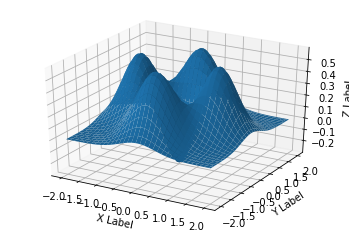

In [8]:
# curl-free and divergence free 
a = -2; b = 2; N = 70;
SIGMA = 0.25*np.eye(2);
mu = np.array([[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1]])
w = [-1, 1, 1, 1, 1]
gma = 0.5;
NumSamp = 500;
CorrRatio = 0.3;

# generate 3D shape
dx = (b-a)/(N-1); dy = dx;
X, Y = np.meshgrid(np.linspace(a, b, N), np.linspace(a, b, N));
T = np.array((X.flatten(), Y.flatten())).T
Z = np.zeros(N);
for ii in range(mu.shape[0]):
    p = w[ii] * scipy.stats.multivariate_normal.pdf(T, mu[ii, :], SIGMA);
    Z = Z + p.reshape((N, N))

# figure, plt.plot_surface(X, Y, Z)
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

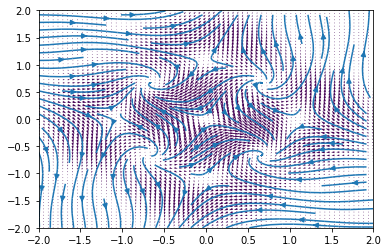

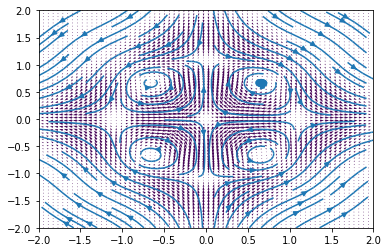

In [11]:

# generate vector field
DX1, DY1 = np.gradient(Z, dx, dy); # divergence-free field
DX2 = -DY1; DY2 = DX1; # curl-free field
DX = -gma*DX1 + (1-gma) * DY1;
DY = -gma*DY1 + (1-gma) * (-DX1);
V = np.array((DX.flatten(), DY.flatten())).T 

# divergence-free field
plt.quiver(X, Y, DX, DY, 1) # , colormap hsv, axis equal, axis tight
plt.streamplot(X, Y, DX, DY, 1)
# curl-free field
plt.figure()
plt.quiver(X, Y, DX2, DY2, 1) # , colormap hsv, axis equal, axis tight
plt.streamplot(X, Y, DX2, DY2, 1)


yt : [INFO     ] 2019-07-03 01:36:40,856 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-03 01:36:40,857 Parameters: domain_dimensions         = [70 70 70]
yt : [INFO     ] 2019-07-03 01:36:40,858 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-03 01:36:40,859 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-03 01:36:40,860 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-07-03 01:36:41,258 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-03 01:36:41,259 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-03 01:36:41,260 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-03 01:36:41,261 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-03 01:36:41,262 Making a fixed resolution buffer of (('stream', 'velocity_sum')) 800 by 800



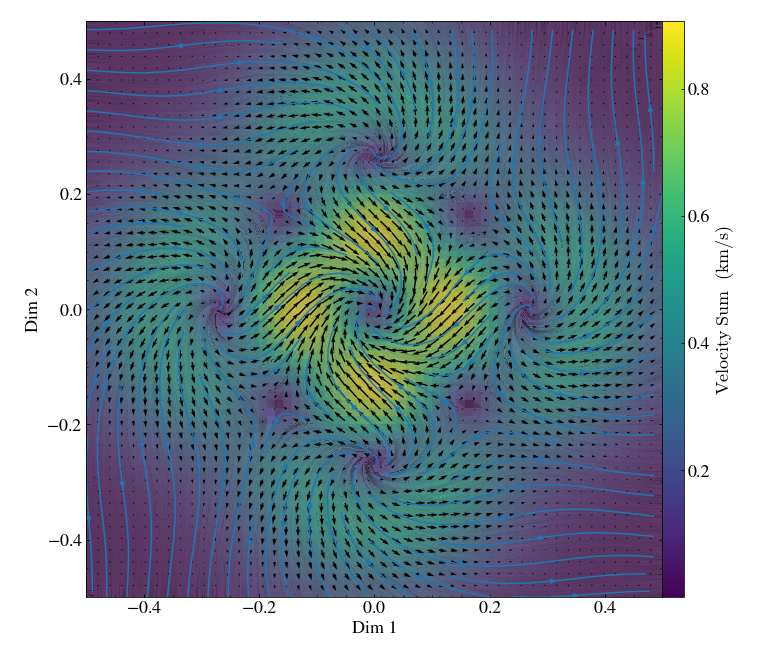

yt : [INFO     ] 2019-07-03 01:36:43,953 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-03 01:36:43,954 Parameters: domain_dimensions         = [70 70 70]
yt : [INFO     ] 2019-07-03 01:36:43,955 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-03 01:36:43,955 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-03 01:36:43,956 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-07-03 01:36:44,416 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-03 01:36:44,417 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-03 01:36:44,418 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-03 01:36:44,419 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-03 01:36:44,420 Making a fixed resolution buffer of (('stream', 'velocity_sum')) 800 by 800



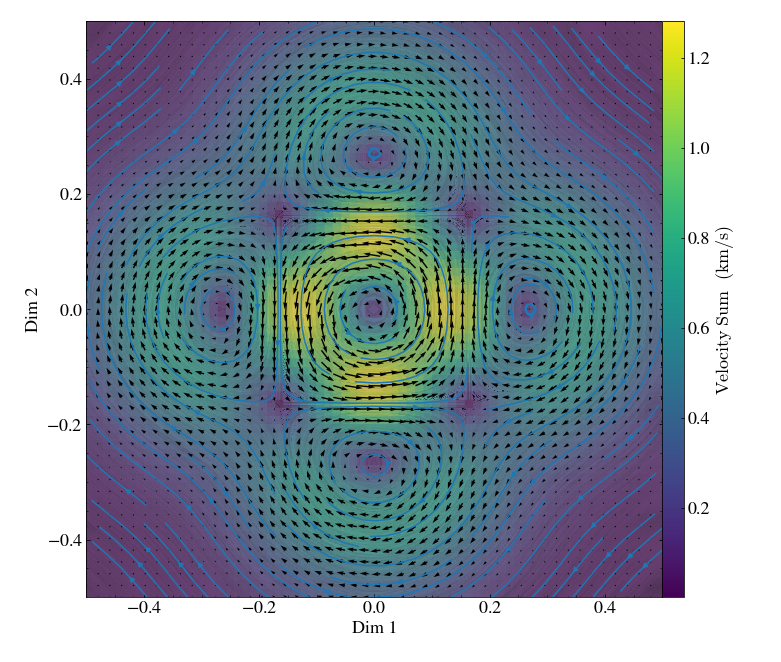

In [12]:

plot_LIC(U_grid = DX, V_grid = DY)
plot_LIC(U_grid = DX2, V_grid = DY2)

In [ ]:
RandIndex = np.random.permutation(range(T.shape[0]))

RandIndex = RandIndex[0:NumSamp]
NumNoise = NumSamp*(1-CorrRatio)
CorrectIndex = np.arange(NumNoise, NumSamp);
TTrain = T[RandIndex,:]
VTrain = V[RandIndex,:]

if NumNoise>0:
    VTrain[:NumNoise, :] = rand(NumNoise,2)*4-2

In [ ]:
# run sparseVFC algorithm 

In [ ]:
# show the results 
function [precision, recall, corrRate] = evaluate(CorrectIndex, VFCIndex, siz)
%   [PRECISION, RECALL, CORRRATE] = EVALUATE(CORRECTINDEX, VFCINDEX, SIZ)
%   evaluates the performence of VFC with precision and recall.
%
% Input:
%   CorrectIndex, VFCIndex: Ground truth indexes and indexes preserved by VFC.
%
%   siz: Number of initial matches.
%
% Output:
%   precision, recall, corrRate: Precision and recall of VFC, percentage of
%       initial correct matches.
%
%   See also:: VFC().

% Authors: Jiayi Ma (jyma2010@gmail.com)
% Date:    04/17/2012

if length(VFCIndex)==0
    VFCIndex = 1:siz;
end

VFCCorrect = intersect(VFCIndex, CorrectIndex);
NumCorrectIndex = length(CorrectIndex);
NumVFCIndex = length(VFCIndex);
NumVFCCorrect = length(VFCCorrect);

corrRate = NumCorrectIndex/siz;
precision = NumVFCCorrect/NumVFCIndex;
recall = NumVFCCorrect/NumCorrectIndex;

fprintf('\ncorrect correspondence rate in the original data: %d/%d = %f\n', NumCorrectIndex, siz, corrRate);
fprintf('precision rate: %d/%d = %f\n', NumVFCCorrect, NumVFCIndex, precision);
fprintf('recall rate: %d/%d = %f\n', NumVFCCorrect, NumCorrectIndex, recall);

In [ ]:
def evaluate(CorrectIndex, VFCIndex, siz): 
    % Input:
%   CorrectIndex, VFCIndex: Ground truth indexes and indexes preserved by VFC.
%
%   siz: Number of initial matches.
%
% Output:
%   precision, recall, corrRate: Precision and recall of VFC, percentage of
%       initial correct matches.
%
%   See also:: VFC().
    
    if len(VFCIndex) == 0:
        VFCIndex = range(siz)
    
    VFCCorrect = np.intersect1d(VFCIndex, CorrectIndex)
    NumCorrectIndex = len(CorrectIndex)
    NumVFCIndex = len(VFCIndex)
    NumVFCCorrect = len(VFCCorrect)

    corrRate = NumCorrectIndex/siz
    precision = NumVFCCorrect/NumVFCIndex
    recall = NumVFCCorrect/NumCorrectIndex

    print('\ncorrect correspondence rate in the original data: %d/%d = %f\n' % NumCorrectIndex, siz, corrRate)
    print('precision rate: %d/%d = %fd\n'% NumVFCCorrect, NumVFCIndex, precision)
    print('recall rate: %d/%d = %f\n' % NumVFCCorrect, NumCorrectIndex, recall)
    
    return corrRate, precision, recall 

In [ ]:
% divergence-free and curl-free 
% function G=con_K(x,y,sigma, gamma)
% % CON_K constructs the kernel K, 
% %   where K(i, j) = k(x, y) = exp(-beta*||x-y||^2).
% 
% [m, d]=size(x); [n, d]=size(y);
% sigma2 = sigma*sigma;
% G_tmp=repmat(x,[1 1 n])-permute(repmat(y,[1 1 m]),[3 2 1]);
% G_tmp=squeeze(sum(G_tmp.^2,2));
% G_tmp3 = -G_tmp/sigma2;
% G_tmp=-G_tmp/(2*sigma2);
% G_tmp=exp(G_tmp)/sigma2;
% G_tmp = kron(G_tmp, ones(d));
% 
% x_tmp = repmat(x,[n 1]);
% y_tmp = repmat(y,[1 m])';
% y_tmp=reshape(y_tmp,[d,m*n])';
% xminusy = (x_tmp-y_tmp);
% G_tmp2 = zeros(d*m, d*n);
% for i=1:d
%     for j=i:d
%         tmp1 = reshape(xminusy(:,i),[m n]);
%         tmp2 = reshape(xminusy(:,j),[m n]);
%         tmp3 = tmp1.*tmp2;
%         tmp4 = zeros(d);
%         tmp4(i,j)=1; tmp4(j,i)=1;
%         G_tmp2 = G_tmp2+kron(tmp3, tmp4);
%     end
% end
% G_tmp2 = G_tmp2/sigma2;
% 
% G_tmp3 = kron((G_tmp3+d-1), eye(d));
% 
% G_tmp4 = kron(ones(m,n),eye(d))-G_tmp2;
% 
% G = (1-gamma)*G_tmp.*(G_tmp2+G_tmp3)+gamma*G_tmp.*G_tmp4;

    K = np.matlib.tile(x[:, :, None], [1, 1, m]) - np.transpose(np.matlib.tile(y[:, :, None], [1, 1, n]), [2, 1, 0])
    K = np.squeeze(np.sum(K**2, 1))
    K = - beta * K
    K = np.exp(K) #


In [3]:
import sys
sys.path.insert(0, 'velocitySlamSeq//slam_seq')

from gillespie import *
from simulation import *
from velocyto_scvelo import *

import pickle
Haber = pickle.load(open('/home/xqiu/proj/scPotential/velocyto-notebooks/python/Haber.pickle', 'rb'))
Haber_adata = vlm_to_adata(Haber)
Haber_adata.obsm['X_umap'] = Haber.embedding
Haber_adata.obsm['velocity_umap'] = Haber.delta_embedding
louvain = Haber_adata.obs.Maintype
louvain[louvain == 'Endocrine'] = 1
louvain[louvain == 'Enterocyte'] = 2
louvain[louvain == 'Goblet'] = 3
louvain[louvain == 'Paneth'] = 4
louvain[louvain == 'Stem'] = 5
louvain[louvain == 'TA'] = 6
louvain[louvain == 'Tuft'] = 7

Haber_adata.obs.louvain = louvain

# res, trajectories = fate(Haber_adata, show_plot=True, color='r', density = 1, xy_grid_nums=[20, 20])

Could not find a filed 'Clusters' in vlm.ca.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [4]:
# res, trajectories = fate(Haber_adata, show_plot=True, color='r', density = 1, xy_grid_nums=[20, 20])

a = Haber.embedding[:, 0].min() - 1
b = Haber.embedding[:, 0].max() + 1


In [6]:
N=70

In [7]:
X, Y = np.meshgrid(np.linspace(a, b, N), np.linspace(a, b, N));
T = np.array((X.flatten(), Y.flatten())).T

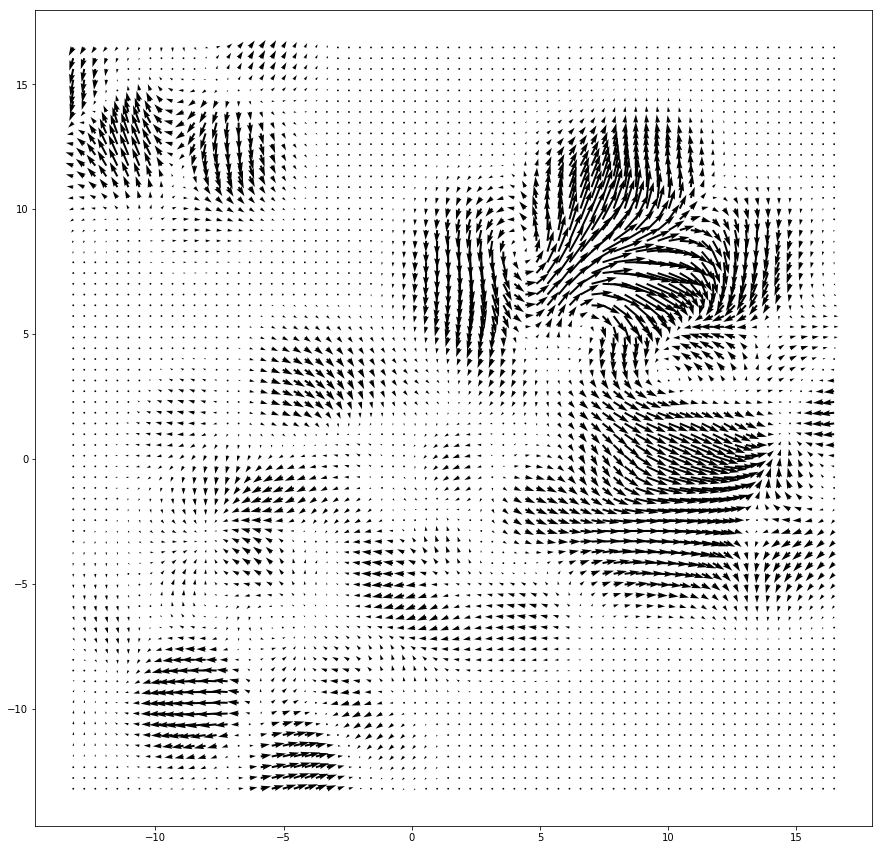

In [8]:
from scVectorField import *
# from scPotential import *

VecFld=SparseVFC(Haber.embedding, Haber.delta_embedding, T);

import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
#plt.quiver(X[:, 0], X[:, 1], VecFld['V'][:, 0], VecFld['V'][:, 1])
plt.quiver(T[:, 0], T[:, 1], VecFld['grid_V'][:, 0], VecFld['grid_V'][:, 1])

yt : [INFO     ] 2019-07-08 15:34:19,898 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-08 15:34:19,899 Parameters: domain_dimensions         = [70 70 70]
yt : [INFO     ] 2019-07-08 15:34:19,900 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-08 15:34:19,901 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-08 15:34:19,902 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-07-08 15:34:20,432 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-08 15:34:20,433 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-08 15:34:20,435 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-08 15:34:20,435 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-08 15:34:20,437 Making a fixed resolution buffer of (('stream', 'velocity_sum')) 800 by 800



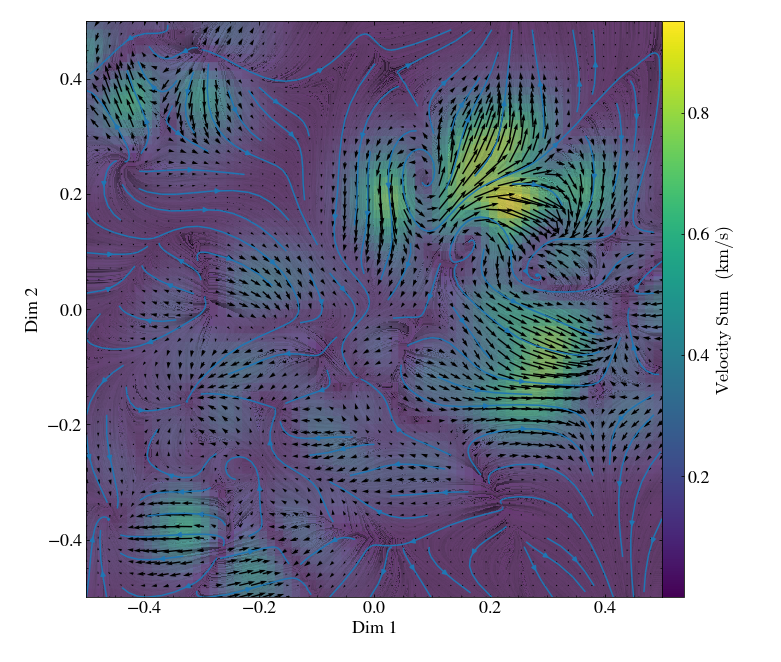

In [14]:
from phase import *
plot_LIC(U_grid = np.reshape(VecFld['grid_V'][:, 0], (N, N)).T, V_grid = np.reshape(VecFld['grid_V'][:, 1], (N, N)).T)

In [47]:
vlm_hgForebrain = pickle.load(open('/home/xqiu/proj/scPotential/velocyto-notebooks/python/hgForebrain.pickle', 'rb'))

In [ ]:
hgForebrain_adata = vlm_to_adata(vlm_hgForebrain)
hgForebrain_adata.obsm['X_umap'] = vlm_hgForebrain.embedding
hgForebrain_adata.obsm['velocity_umap'] = vlm_hgForebrain.delta_embedding

# res, trajectories = fate(hgForebrain_adata, show_plot=True, color='r', density = 1, xy_grid_nums=[20, 20])


yt : [INFO     ] 2019-07-08 01:45:28,990 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-08 01:45:28,991 Parameters: domain_dimensions         = [70 70 70]
yt : [INFO     ] 2019-07-08 01:45:28,992 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-08 01:45:28,992 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-08 01:45:28,993 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-07-08 01:45:29,332 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-08 01:45:29,333 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-08 01:45:29,334 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-08 01:45:29,335 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-08 01:45:29,336 Making a fixed resolution buffer of (('stream', 'velocity_sum')) 800 by 800



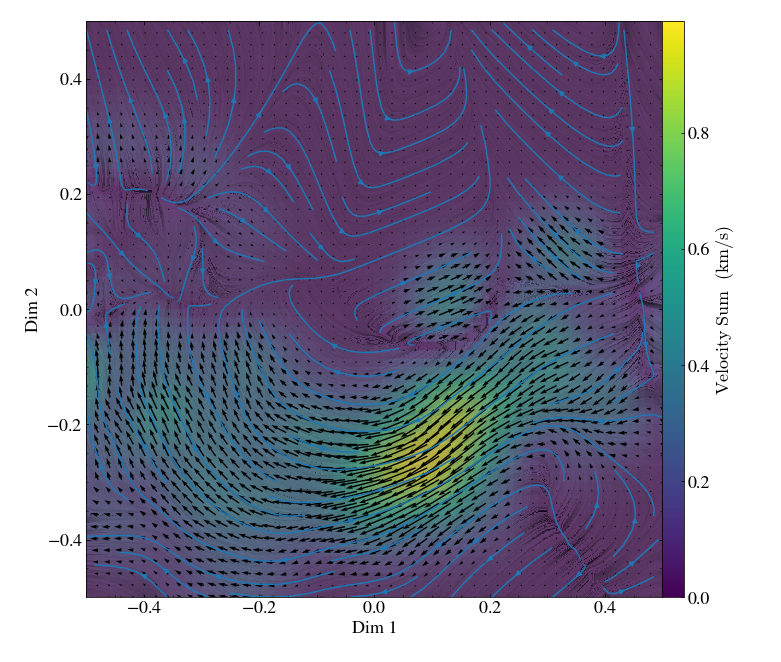

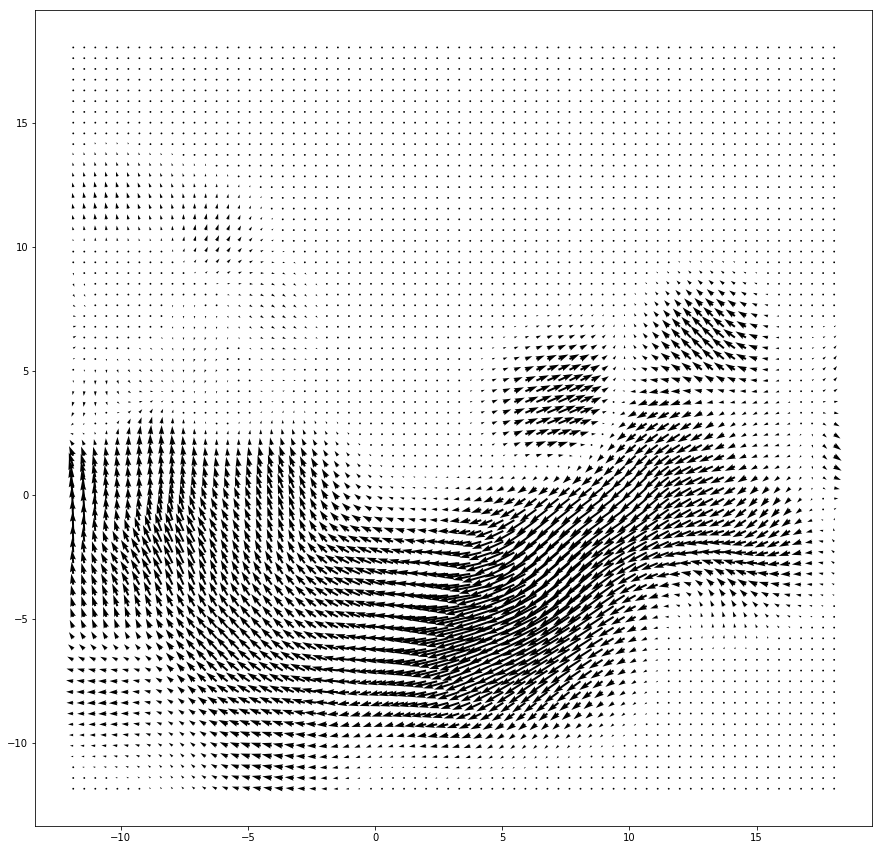

In [51]:
a = vlm_hgForebrain.embedding[:, 0].min() - 1
b = vlm_hgForebrain.embedding[:, 0].max() + 1

X, Y = np.meshgrid(np.linspace(a, b, N), np.linspace(a, b, N));
T = np.array((X.flatten(), Y.flatten())).T

VecFld=SparseVFC(vlm_hgForebrain.embedding, vlm_hgForebrain.delta_embedding, T);

plt.figure(figsize = (15, 15))
#plt.quiver(X[:, 0], X[:, 1], VecFld['V'][:, 0], VecFld['V'][:, 1])
plt.quiver(T[:, 0], T[:, 1], VecFld['grid_V'][:, 0], VecFld['grid_V'][:, 1])

plot_LIC(U_grid = np.reshape(VecFld['grid_V'][:, 0], (N, N)).T, V_grid = np.reshape(VecFld['grid_V'][:, 1], (N, N)).T)